#### 해결해야할 문제1) 0시 이후 시간을 -1하다보니 -1된 상품이 해당 일의 가장 먼저 방송된 것으로 처리됨.
#### 예) 9월 15일 01:20에 방송된 쥐포는 9월 14일의 마지막 방송으로 처리되어야 하지만 9월 14일의 첫 방송으로 처리됨.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from tqdm.notebook import tqdm
from datetime import datetime
# pd.set_option('display.max_rows', 100)
%matplotlib inline
plt.style.use('ggplot') # 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
# 나눔고딕코드 폰트 설치 (필요한사람만 돌리세요)
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# plt.rc('font', family='NanumBarunGothic')

In [2]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    from google.colab import drive
    drive.mount('/content/drive')
    sum_df = pd.read_csv('/content/drive/My Drive/빅데이터_콘테스트/sum_df.csv')
else:
    print('Not running on CoLab')
    sum_df = pd.read_csv('c:/bc/sum_df.csv')

Not running on CoLab


In [3]:
sum_df['HOUR'] = sum_df['HOUR'].replace(0,24).replace(1,25).replace(2,26)

In [4]:
sum_df['quarter'] = pd.to_datetime(sum_df.broadcast).dt.quarter

In [5]:
sum_df['timeslot'] = pd.cut(sum_df.HOUR, bins = [0,8,11,14,17,20,23,26], \
                             labels = [1,2,3,4,5,6,7])

In [6]:
seasons = [4, 4, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4]
month_to_season = dict(zip(range(1,13), seasons))

In [7]:
sum_df['season'] = sum_df.MONTH.map(month_to_season)

In [8]:
재핑타임
불특정 다수
상품 자체에 집중하는 전략

SyntaxError: invalid syntax (<ipython-input-8-1fd88fc34b01>, line 2)

- T커머스, TV라는 매체의 특수성을 활용하여 재핑타임을 적극적으로 활용해야한다??
- 상품 자체보다는 인플루언서의 이름값에 크게 기대는 라이브커머스와는 다르게, 상품 자체에 집중하는 전략?(품질 등)
- 라이브커머스는 시청자수가 많지 않다는 문제.
홈쇼핑, 고정된 채널과 특정 시간대가 프라임 시간으로 정해짐. 그러나 라이브커머스는 불특정 다수에게 접근하기 어렵다. 일부 얼리어답터를 타겟으로 한다.

방송을 보게 하는 것 자체가 마케팅

In [9]:
def split_df(df, feature ,interested_feature):
    return df[df[feature] == interested_feature].reset_index(drop=True)

In [10]:
def year_timeslot(group):
    row = 2
    col = 2
    f, ax = plt.subplots(row,col,figsize=(24,6 * row))

    # 시간대와 요일
    sns.barplot(x = 'DAY_NUM', y = 'total_price', data = split_df(sum_df,'p_group',group), hue = 'timeslot', ax = ax[0,0])
    sns.boxplot(x = 'DAY_NUM', y = 'unit_price', data = split_df(sum_df,'p_group',group), hue = 'timeslot', ax = ax[1,0])
    
    # 계절과 요일
    sns.barplot(x = 'season', y = 'total_price', data = split_df(sum_df,'p_group', group), hue = 'DAY_NUM', ax = ax[0,1])
    sns.boxplot(x = 'season', y = 'unit_price', data = split_df(sum_df,'p_group', group), hue = 'DAY_NUM', ax = ax[1,1])
    
#     # 단가의 변화 추이 살펴보기
#     sns.boxplot(x = 'DAY_NUM', y = 'unit_price', data = split_df(sum_df,'p_group', group), hue = 'timeslot', ax = ax[2,0])
#     sns.boxplot(x = 'season', y = 'unit_price', data = split_df(sum_df,'p_group', group), hue = 'timeslot', ax = ax[2,1])
    
def season_timeslot(group):
    row = 4
    col = 2
    f, ax = plt.subplots(row,col,figsize=(20,6 * row))
    # 시즌1의 매출
    sns.barplot(x = 'DAY_NUM', y = 'total_price', data = split_df(split_df(sum_df,'p_group',group),'season',1), hue = 'timeslot', ax = ax[0,0])
    sns.boxplot(x = 'DAY_NUM', y = 'unit_price', data = split_df(split_df(sum_df,'p_group',group),'season',1), hue = 'timeslot', ax = ax[1,0])
    sns.barplot(x = 'DAY_NUM', y = 'total_price', data = split_df(split_df(sum_df,'p_group',group),'season',2), hue = 'timeslot', ax = ax[0,1])
    sns.boxplot(x = 'DAY_NUM', y = 'unit_price', data = split_df(split_df(sum_df,'p_group',group),'season',2), hue = 'timeslot', ax = ax[1,1])
    sns.barplot(x = 'DAY_NUM', y = 'total_price', data = split_df(split_df(sum_df,'p_group',group),'season',3), hue = 'timeslot', ax = ax[2,0])
    sns.boxplot(x = 'DAY_NUM', y = 'unit_price', data = split_df(split_df(sum_df,'p_group',group),'season',3), hue = 'timeslot', ax = ax[3,0])
    sns.barplot(x = 'DAY_NUM', y = 'total_price', data = split_df(split_df(sum_df,'p_group',group),'season',4), hue = 'timeslot', ax = ax[2,1])
    sns.boxplot(x = 'DAY_NUM', y = 'unit_price', data = split_df(split_df(sum_df,'p_group',group),'season',4), hue = 'timeslot', ax = ax[3,1])

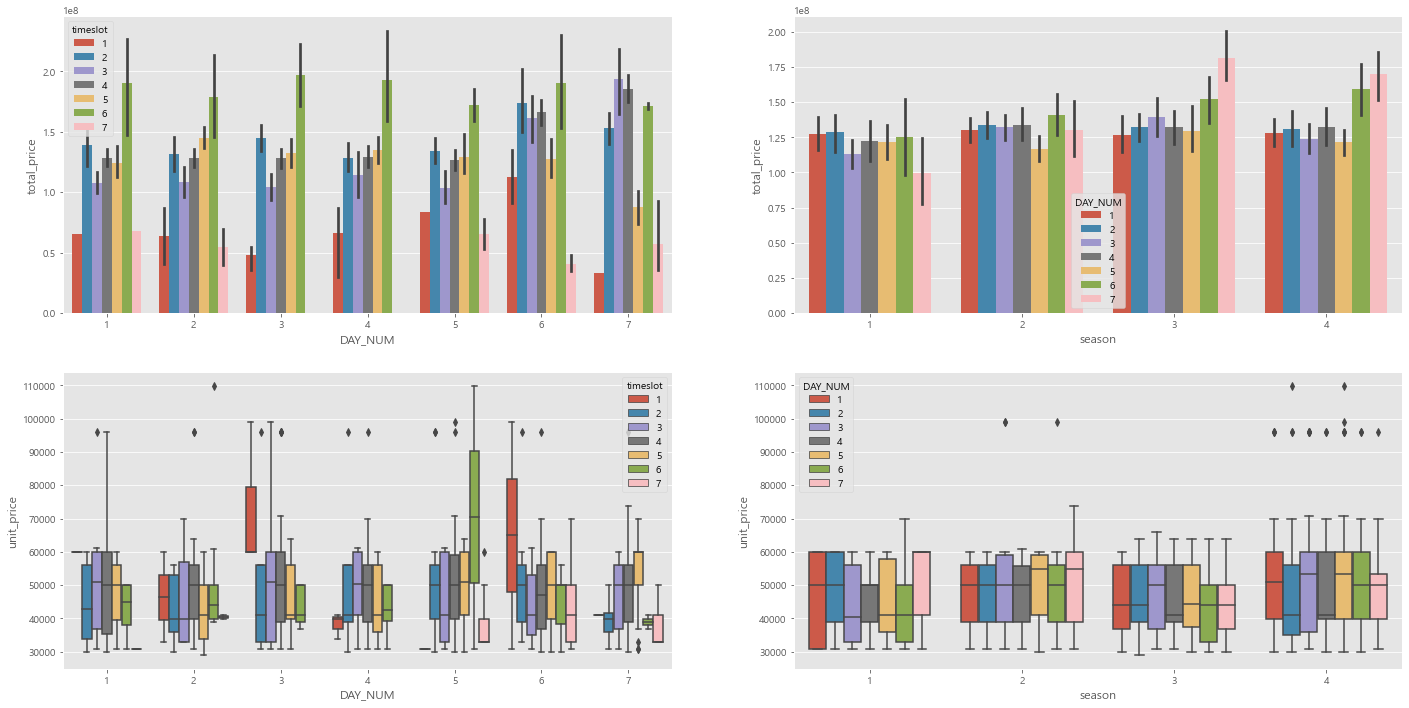

In [11]:
year_timeslot('농수축')

### 1년 전체를 계절과 요일로 나누어봤을 때
##### 그래프1 - 1년을 요일로 나눴을 때
- 꾸준한 매출을 기록하는 밤 시간대(21~23시)
- 일요일 이른아침, 매출 저조 

##### 그래프2 - 1년을 시즌별로
- 가을의 심야시간 매출이 눈에 띈다.
- 봄의 심야시간 매출이 낮다.
- 봄/여름과 가을/겨울의 심야시간 매출차이.

#### '시간대'를 중심으로 전체 기간을 변화시키면서 살펴보자(보다 체계적으로)

# 4계절 각각의 시간대/요일별 살펴보기

# 농수축

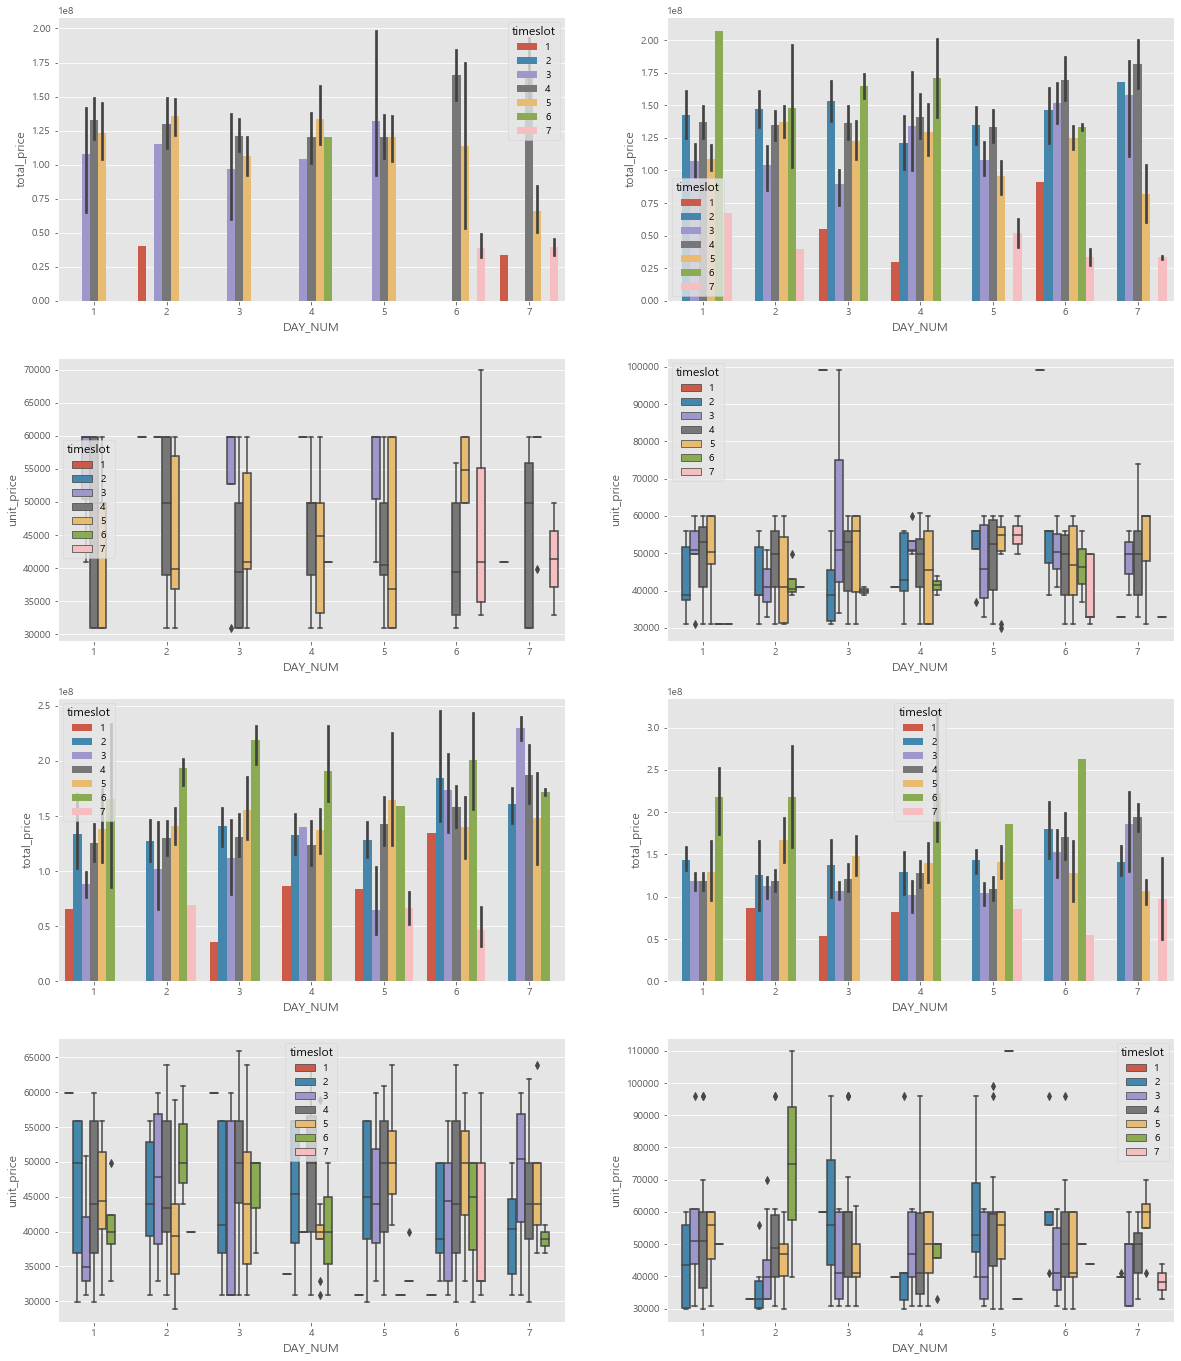

In [16]:
season_timeslot('농수축')

# 농수축
봄
- 평일에는 주로 점심, 오후, 저녁에 매출이 발생했으며  
- 주말에는 이른 아침과 심야시간에 매출이 발생함  
  
여름
- 아침, 점심, 오후, 저녁, 밤으로 매출발생 시간대가 넓어짐.
- 평일에도 심야 매출 발생

가을
- 여름에 비해 아침 매출 증가
- 일요일의 점심 매출증가가 눈에 띈다.

겨울
- 밤시간 매출이 두드러지지만, 특이하게 일요일의 밤시간 매출이 크게 떨어진다.
- 주말의 이른아침 매출이 사라짐

# 이미용

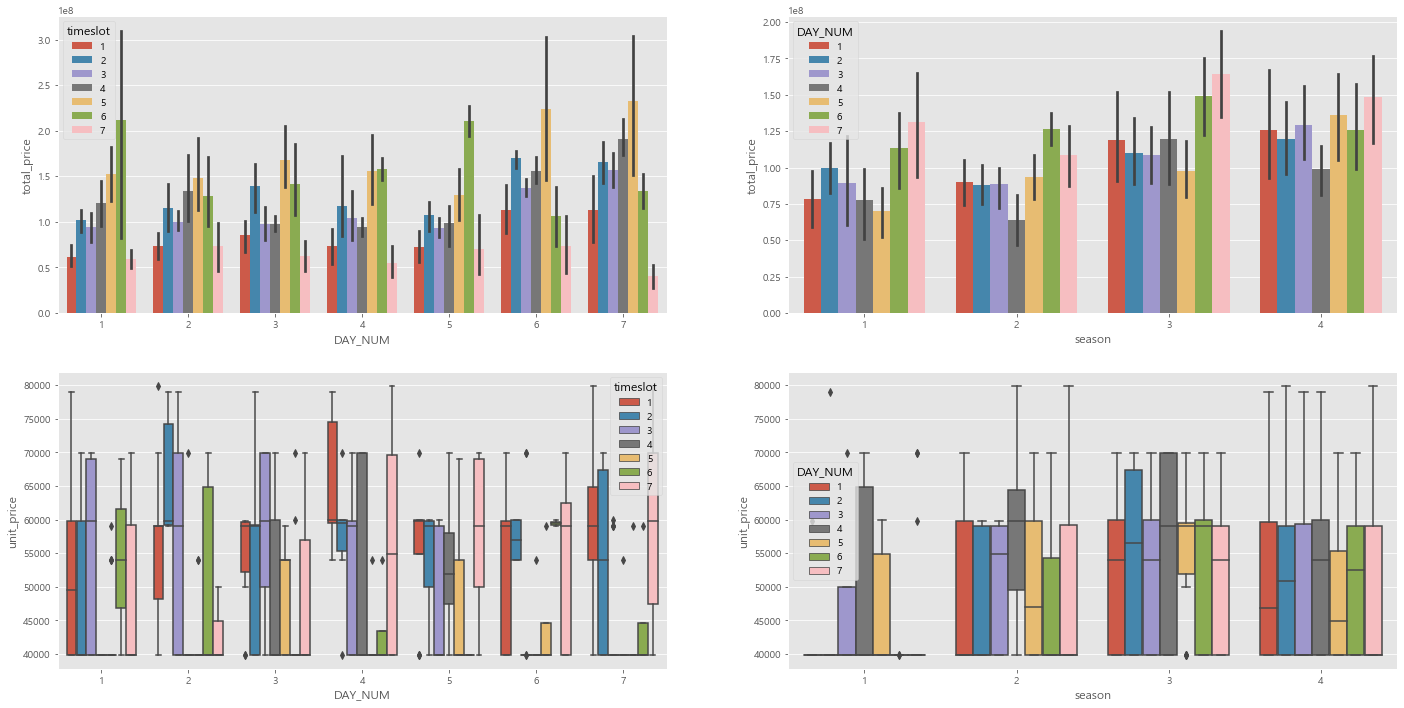

In [14]:
year_timeslot('이미용')

1년 전체로 보았을 때

##### 그래프1
- 평일과 주말의 저녁과 밤 시간대의 매출 차이가 두드러진다. 주말에 저녁시간대 이미용 매출이 크게 증가
- 주말에 이른 시간 매출이 증가한다.

##### 그래프2
- 1년 내내 주말의 매출이 크다.
- 가을, 겨울로 가면서 주말 매출이 크게 증가한다.

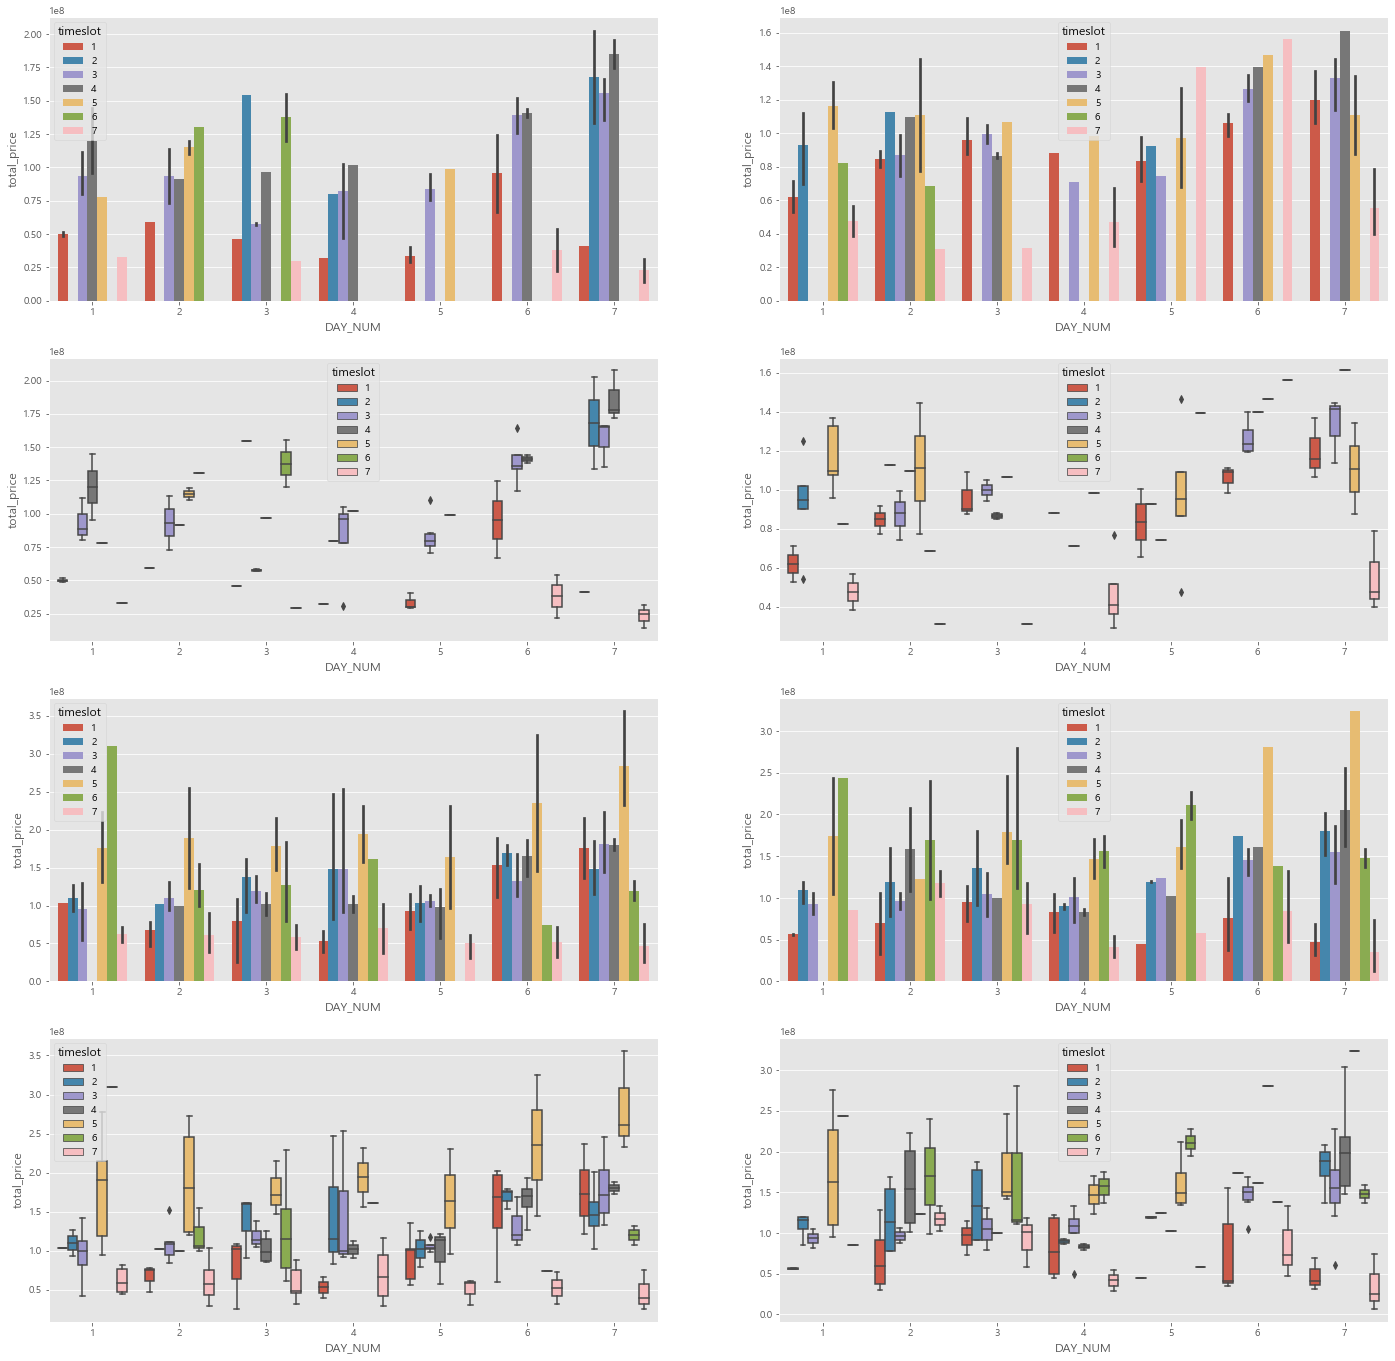

In [178]:
season_timeslot('이미용')

# 의류

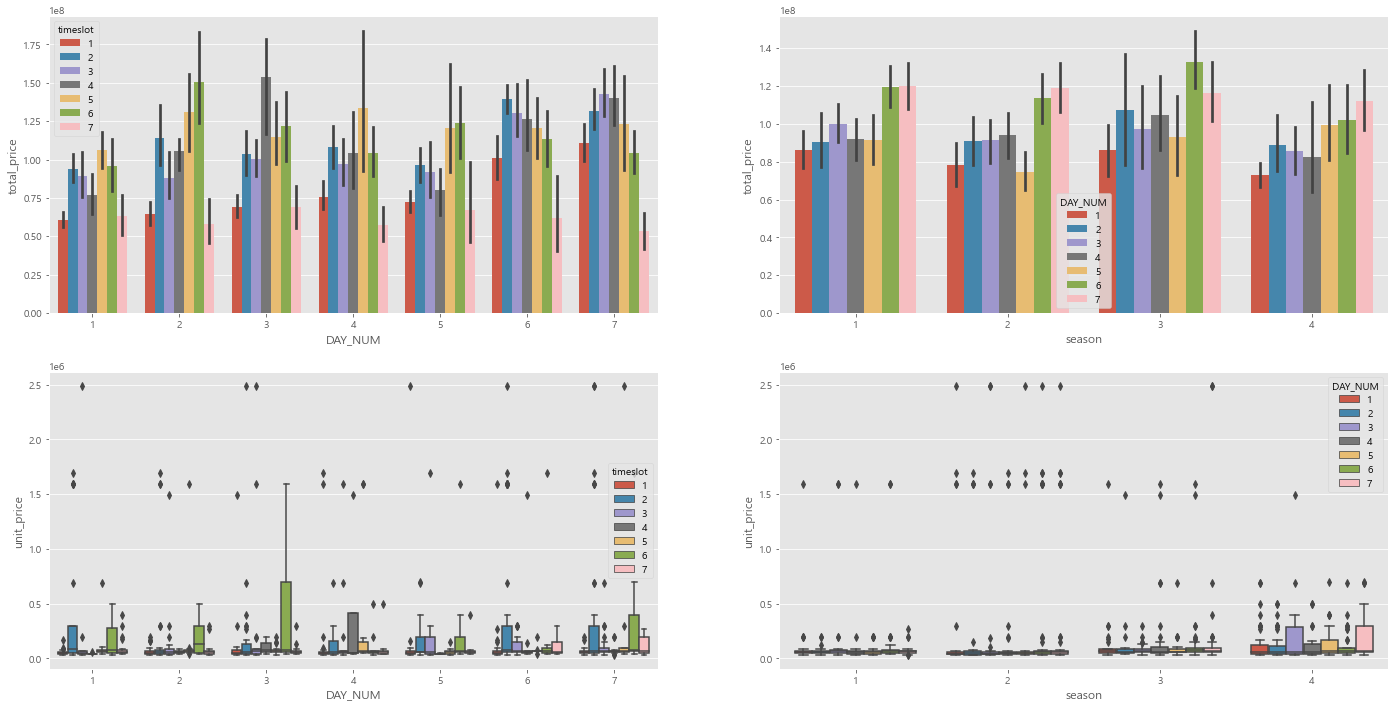

In [12]:
year_timeslot('의류')

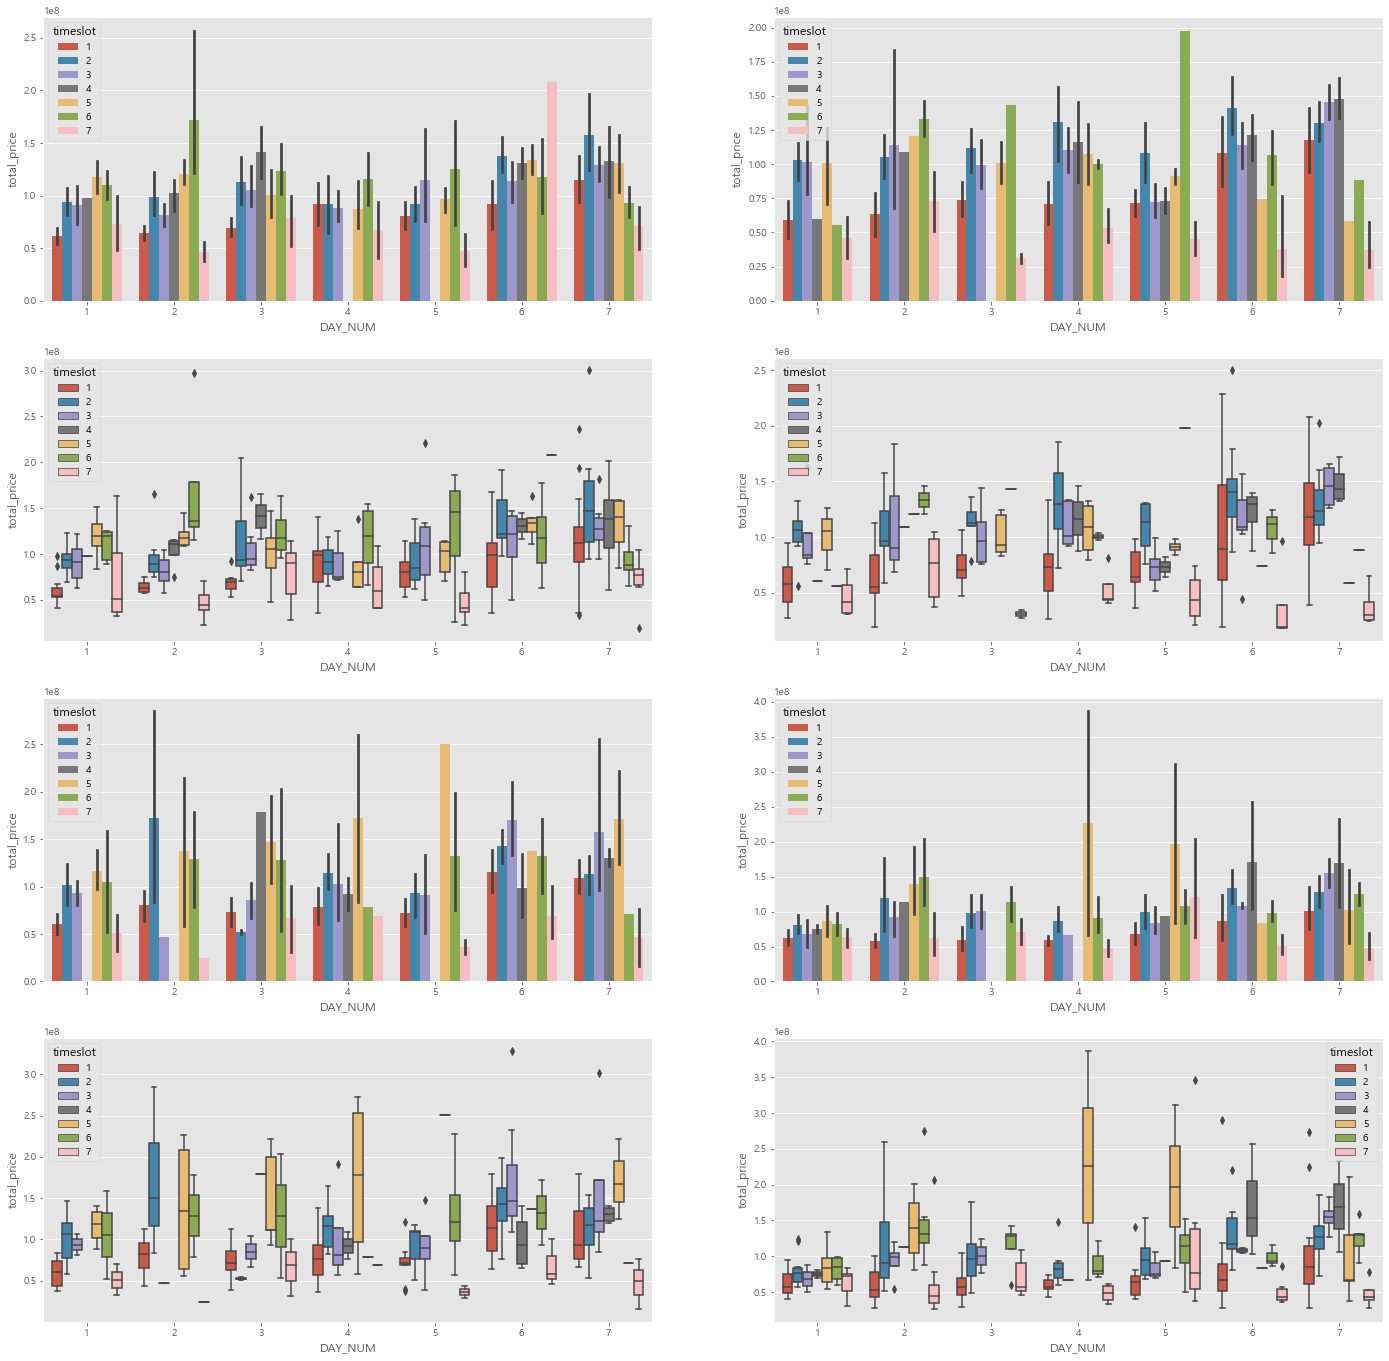

In [180]:
season_timeslot('의류')

# 속옷

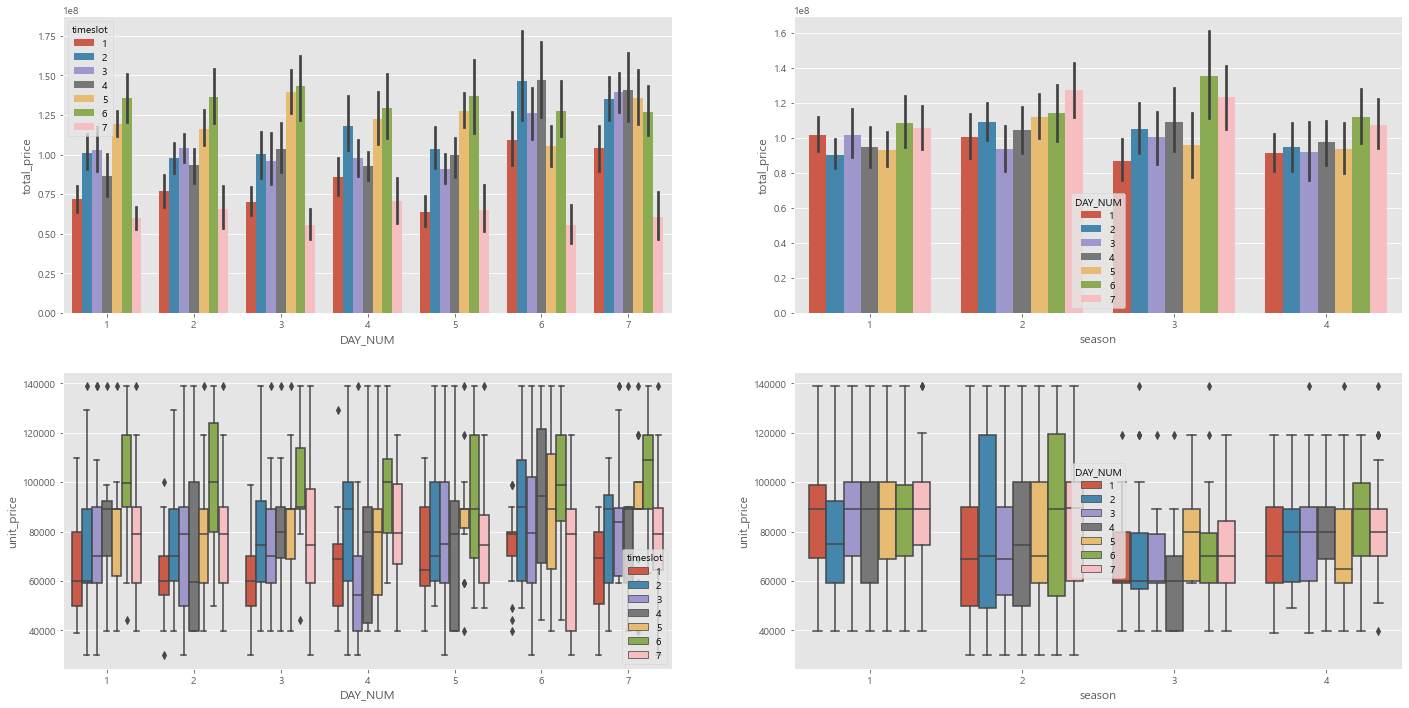

In [13]:
year_timeslot('속옷')

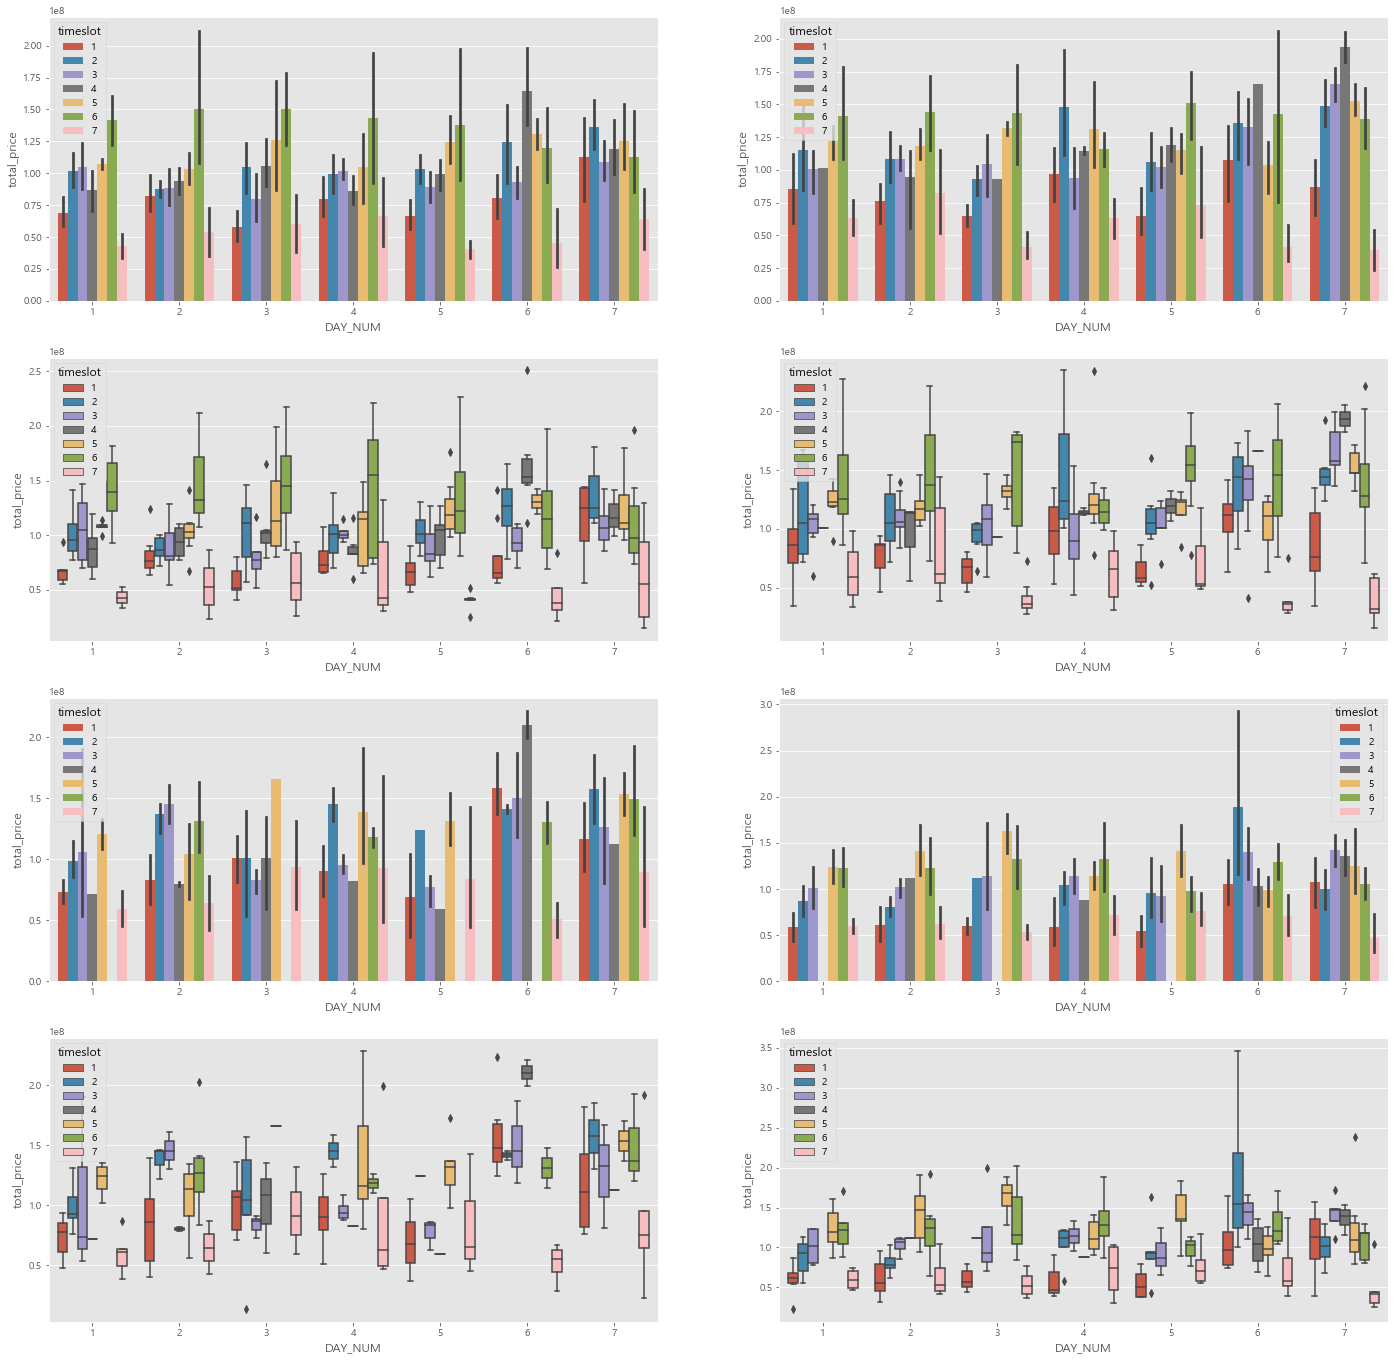

In [182]:
season_timeslot('속옷')

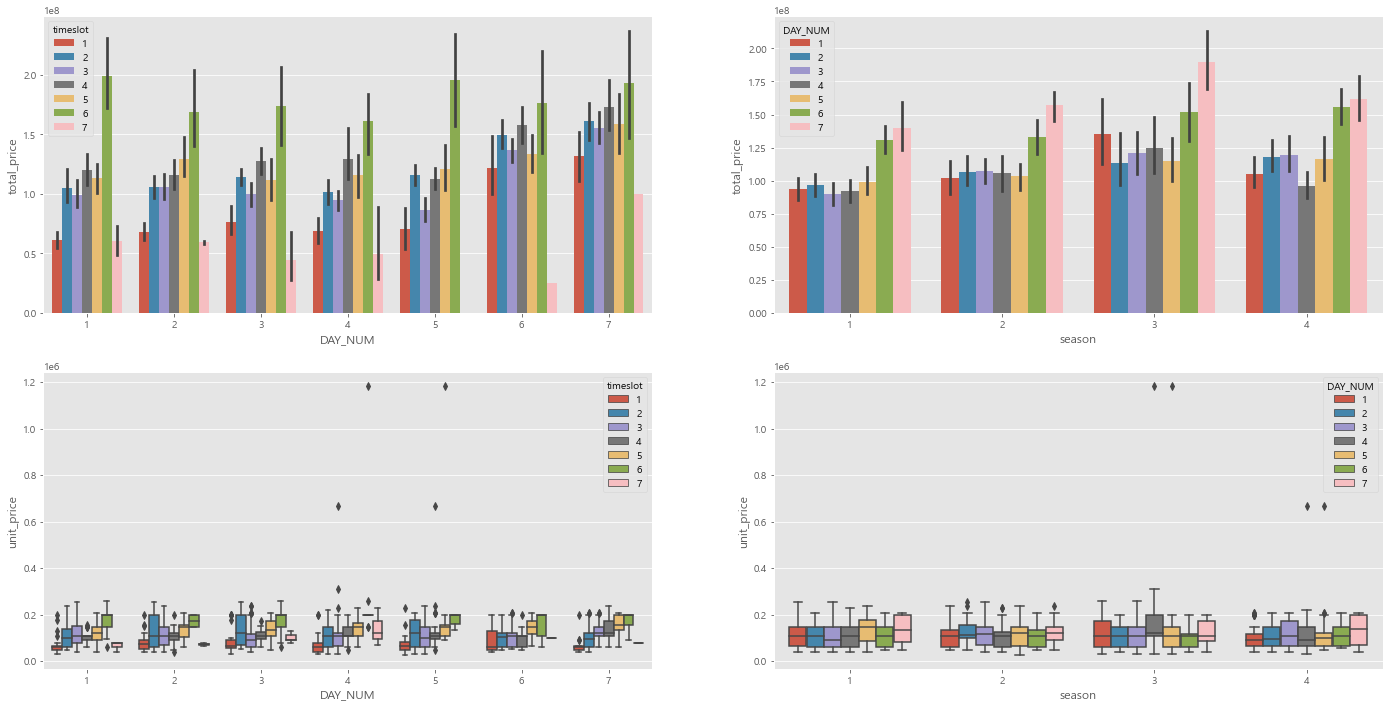

In [14]:
year_timeslot('주방')

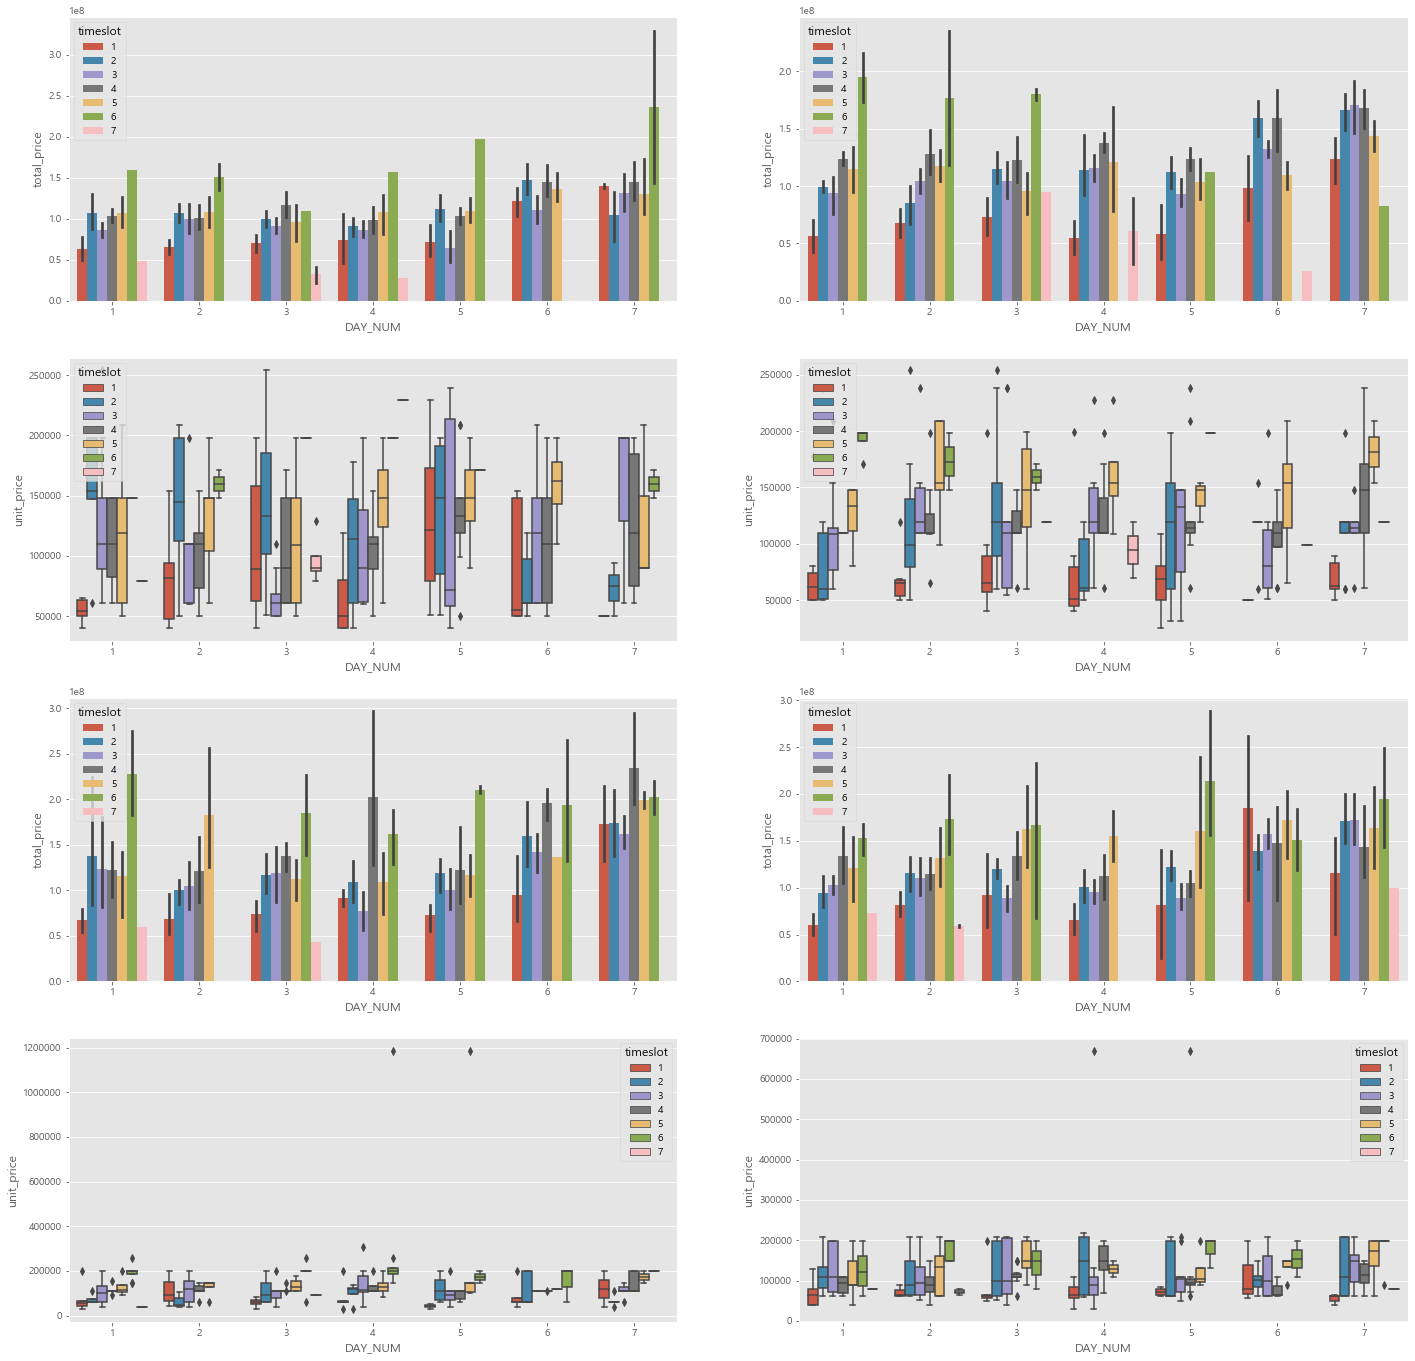

In [190]:
season_timeslot('주방')

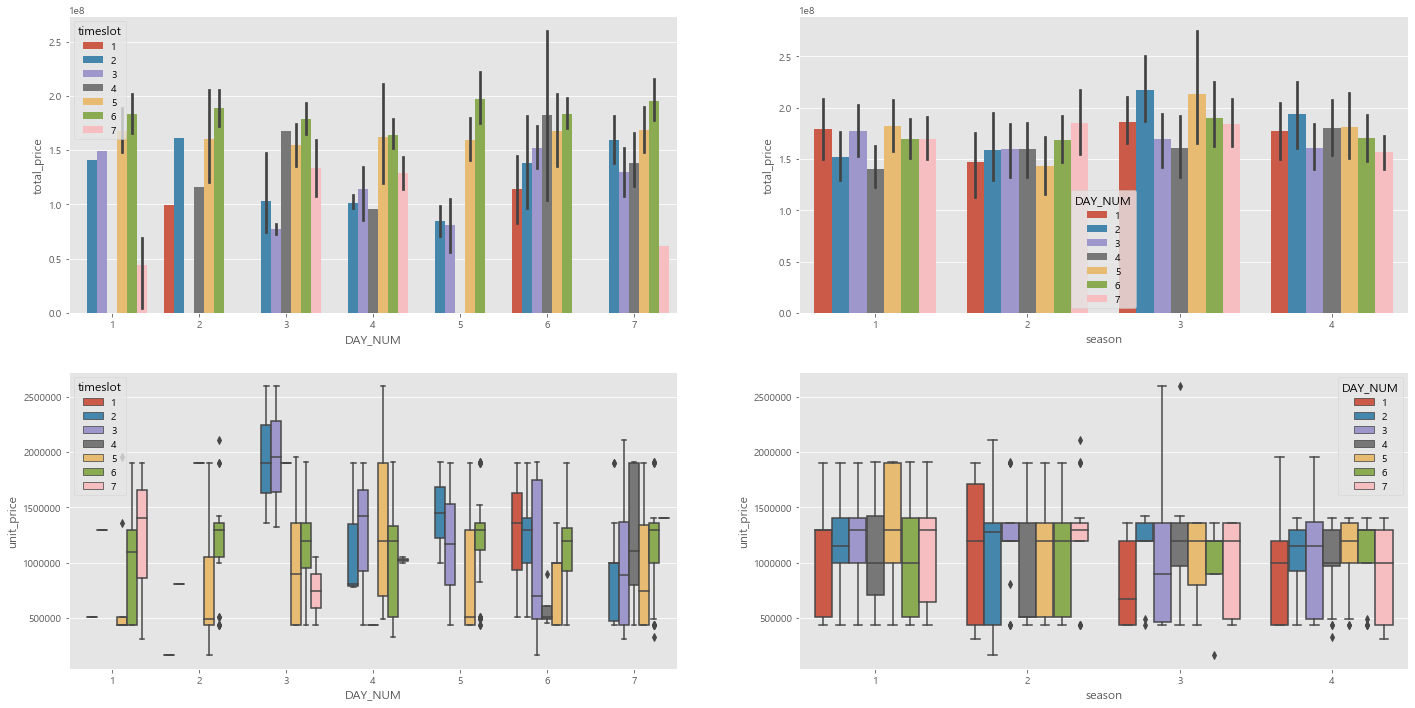

In [17]:
year_timeslot('가전')

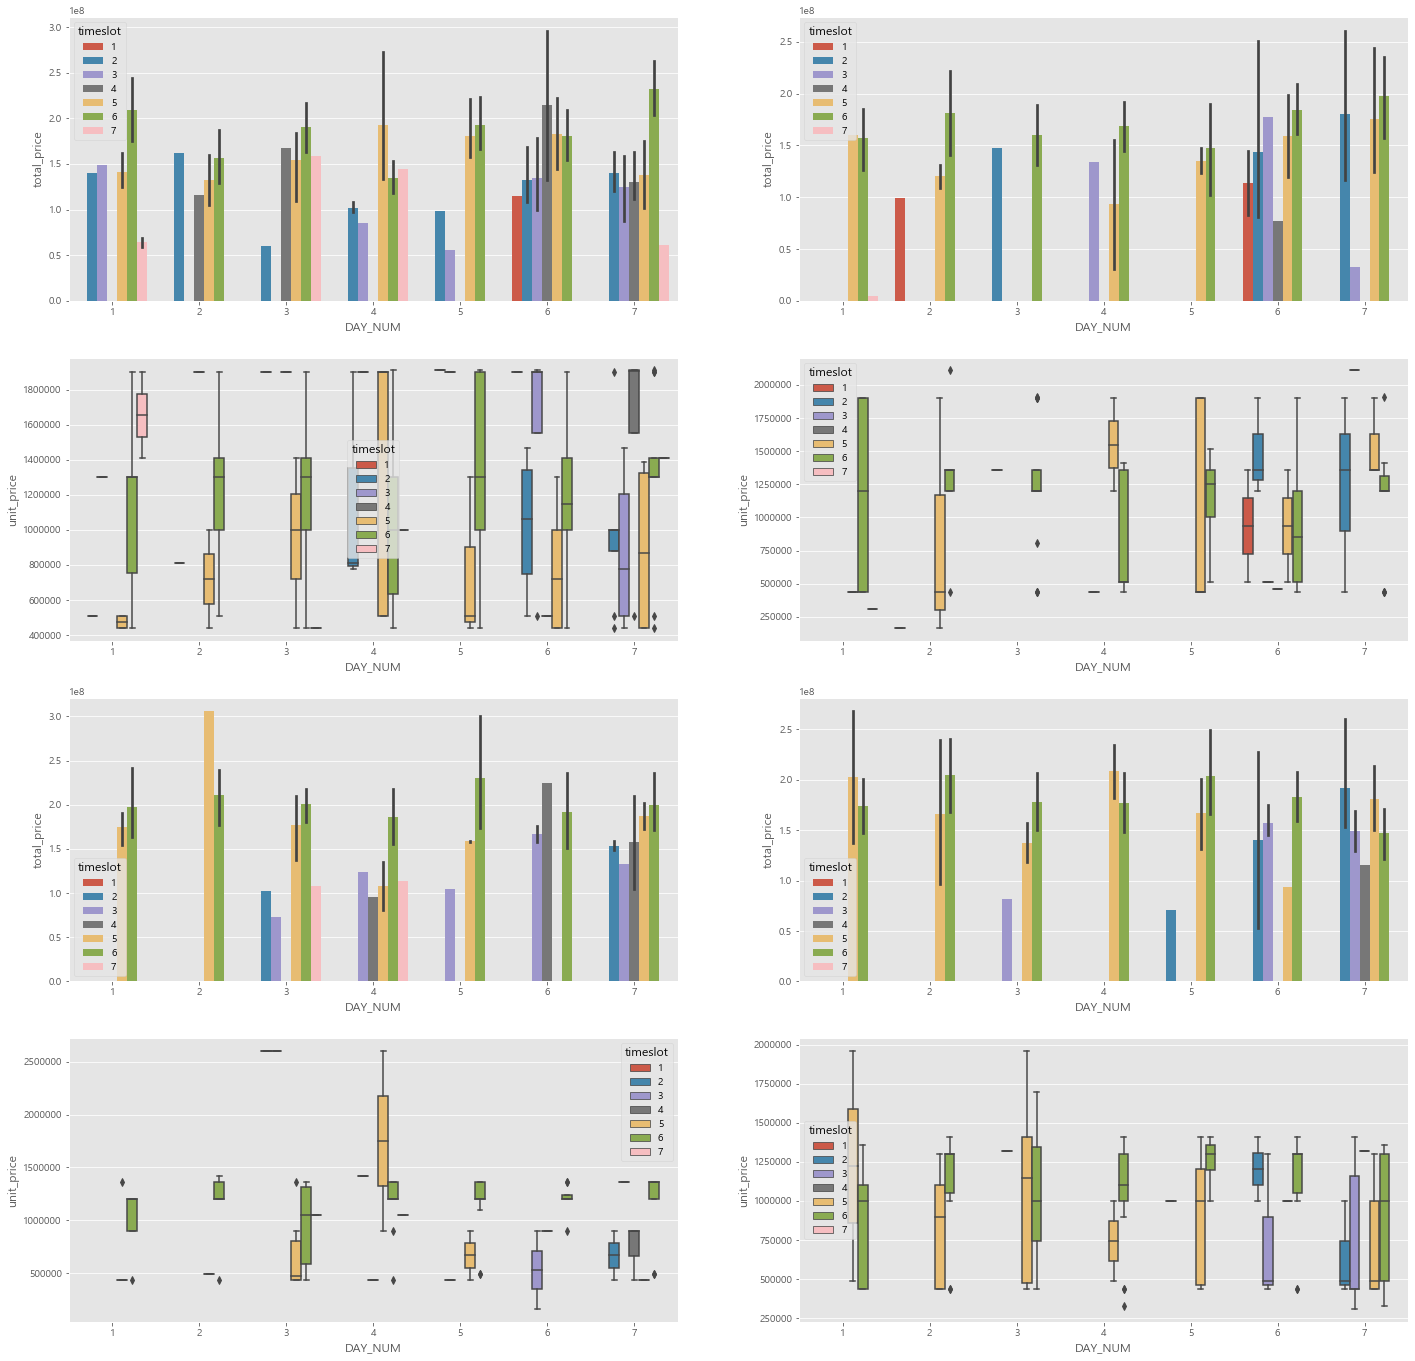

In [192]:
season_timeslot('가전')

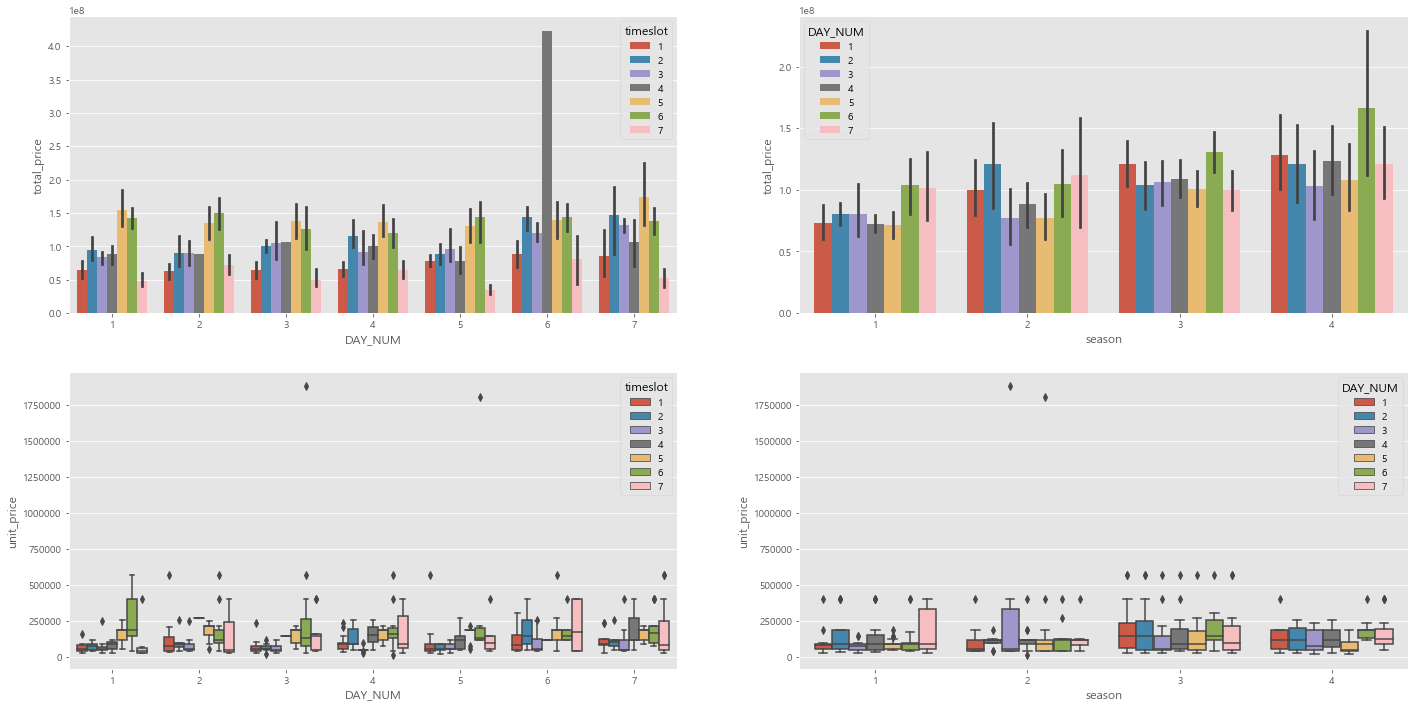

In [13]:
year_timeslot('생활용품')

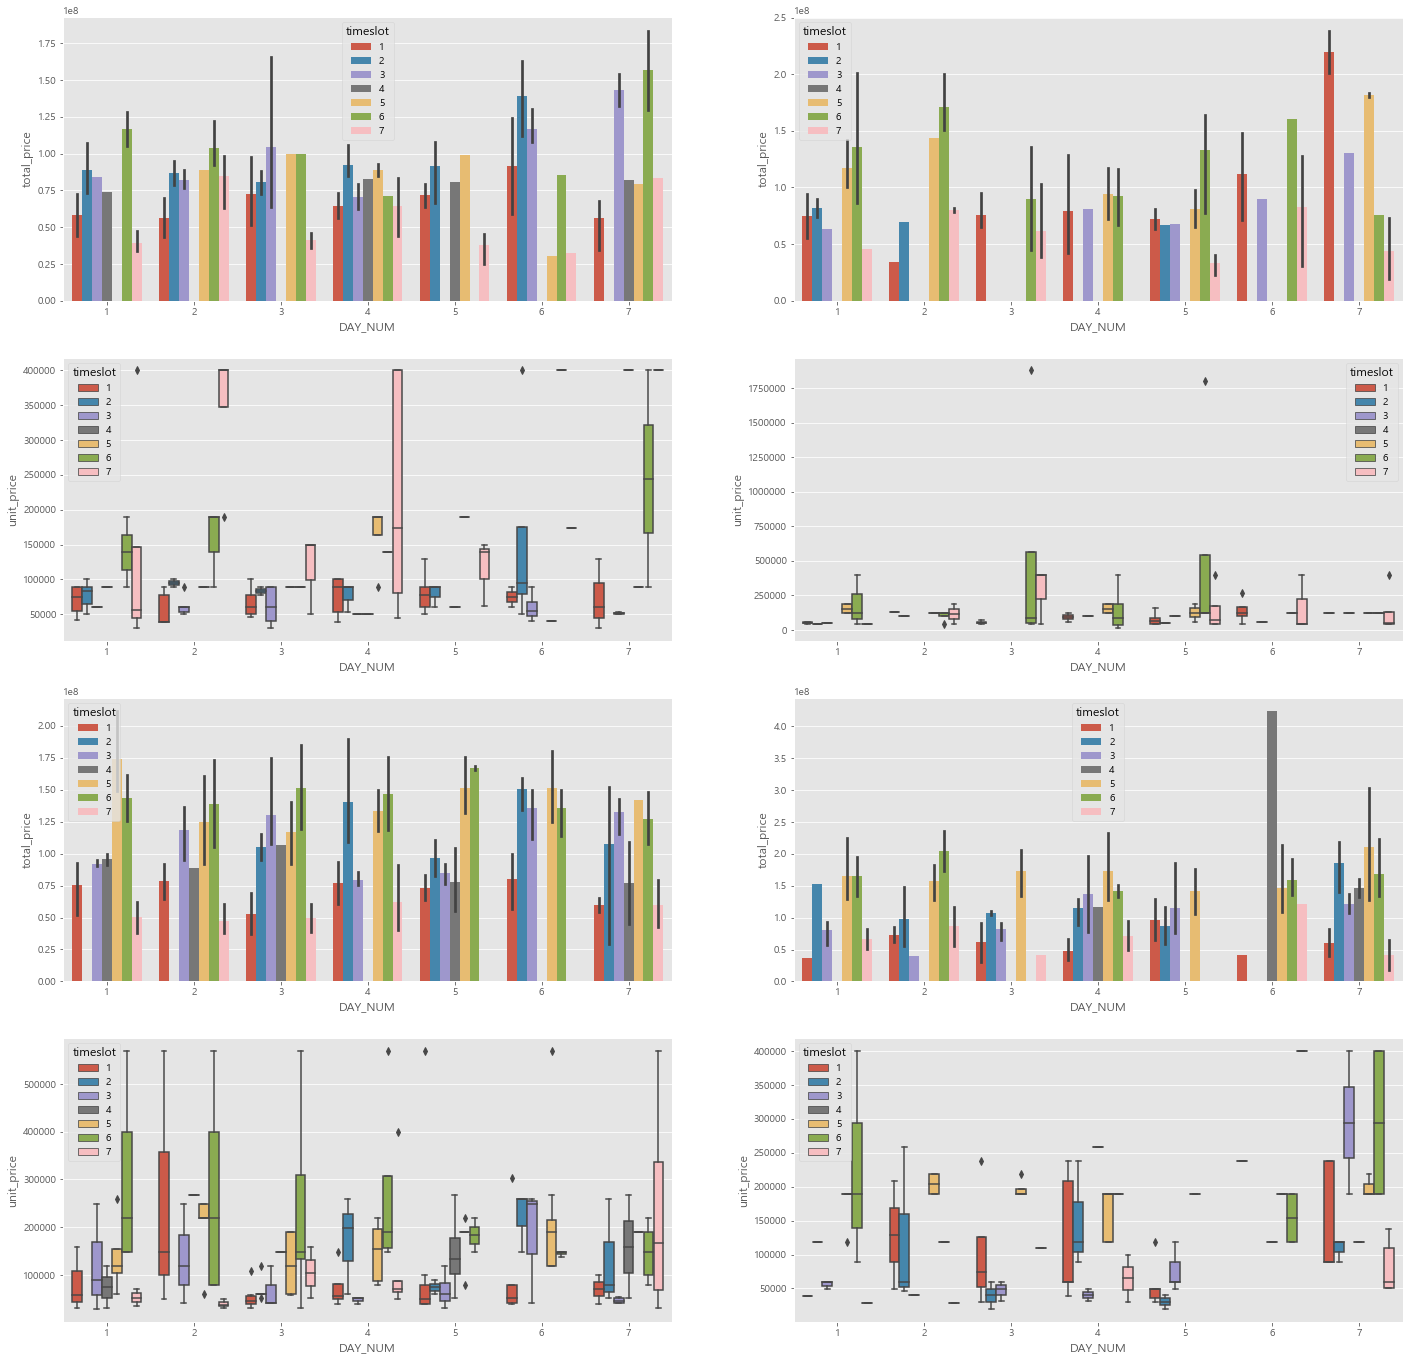

In [196]:
season_timeslot('생활용품')

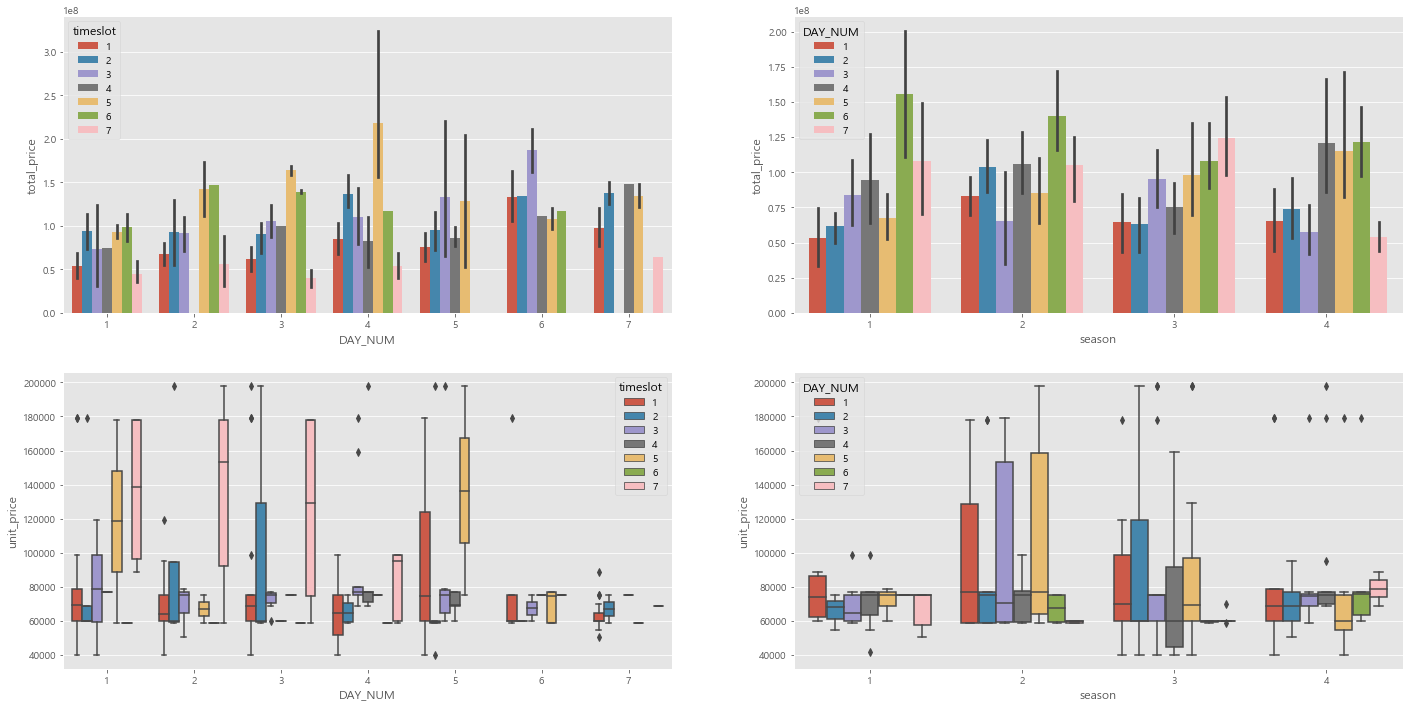

In [206]:
year_timeslot('건강기능')

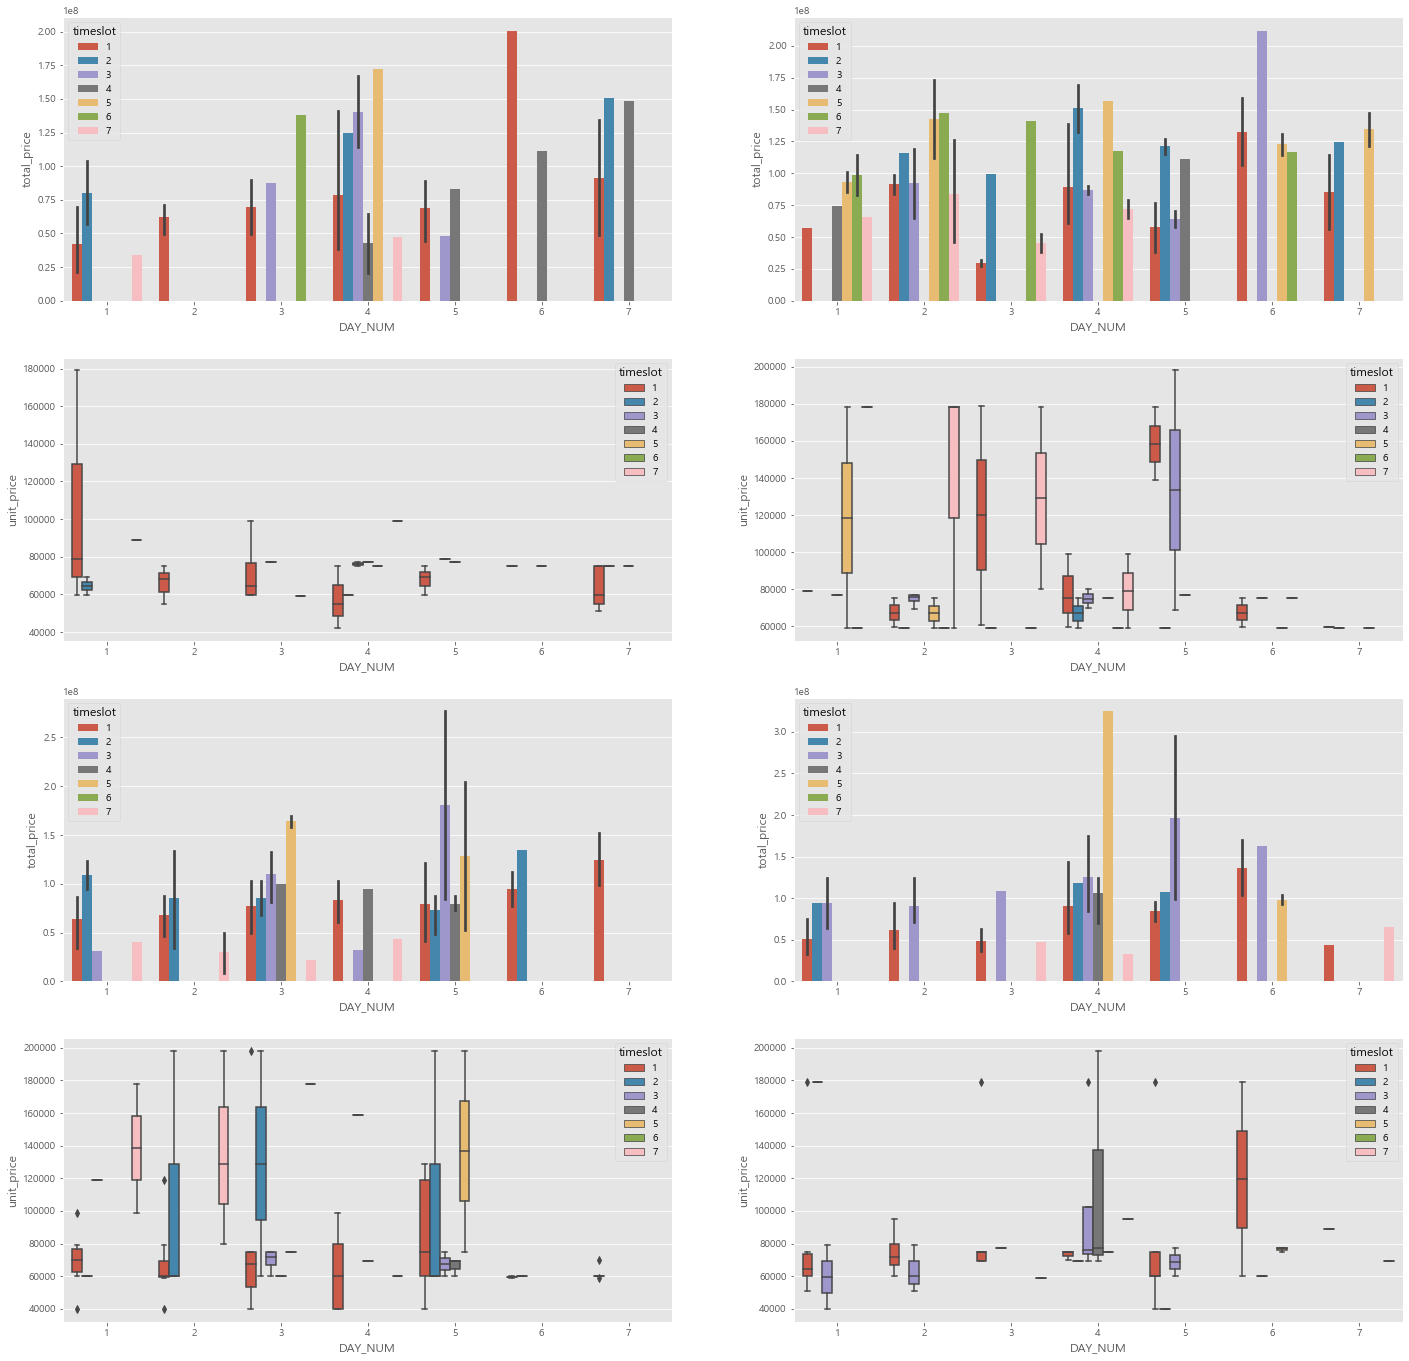

In [198]:
season_timeslot('건강기능')

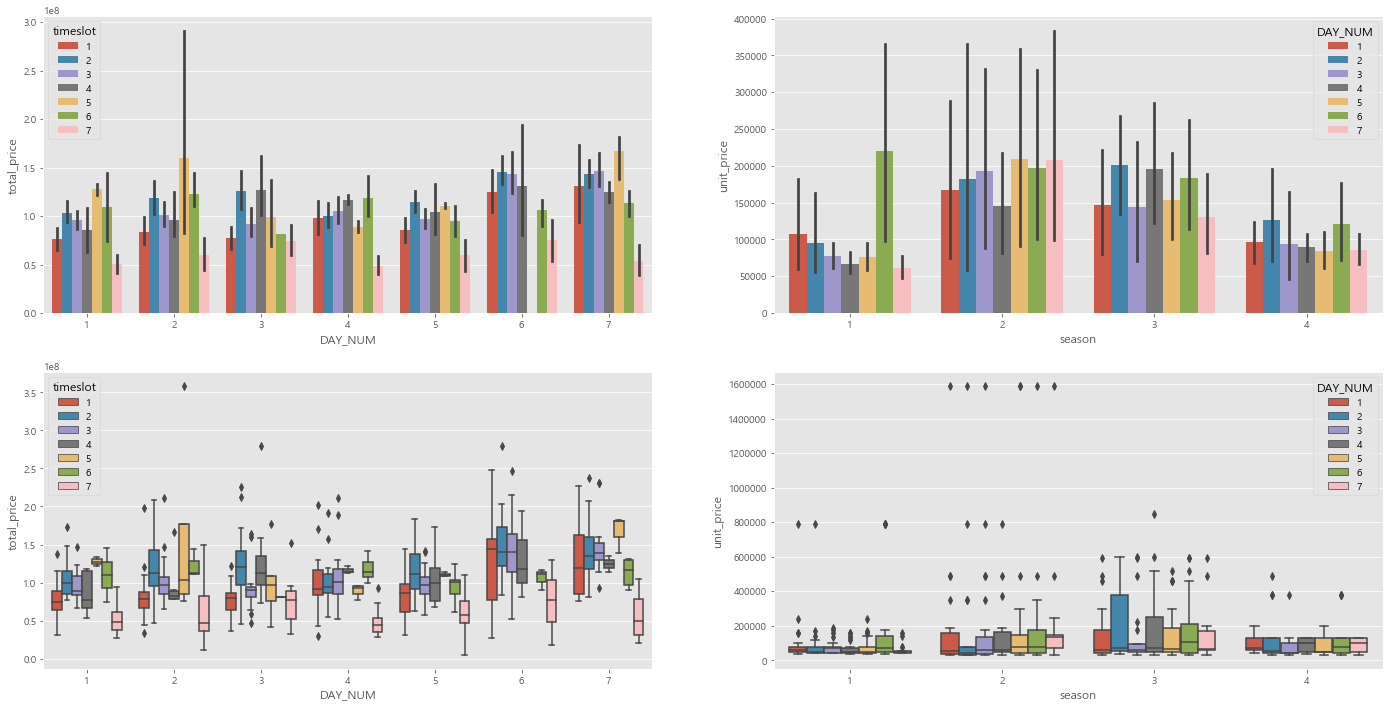

In [199]:
year_timeslot('잡화')

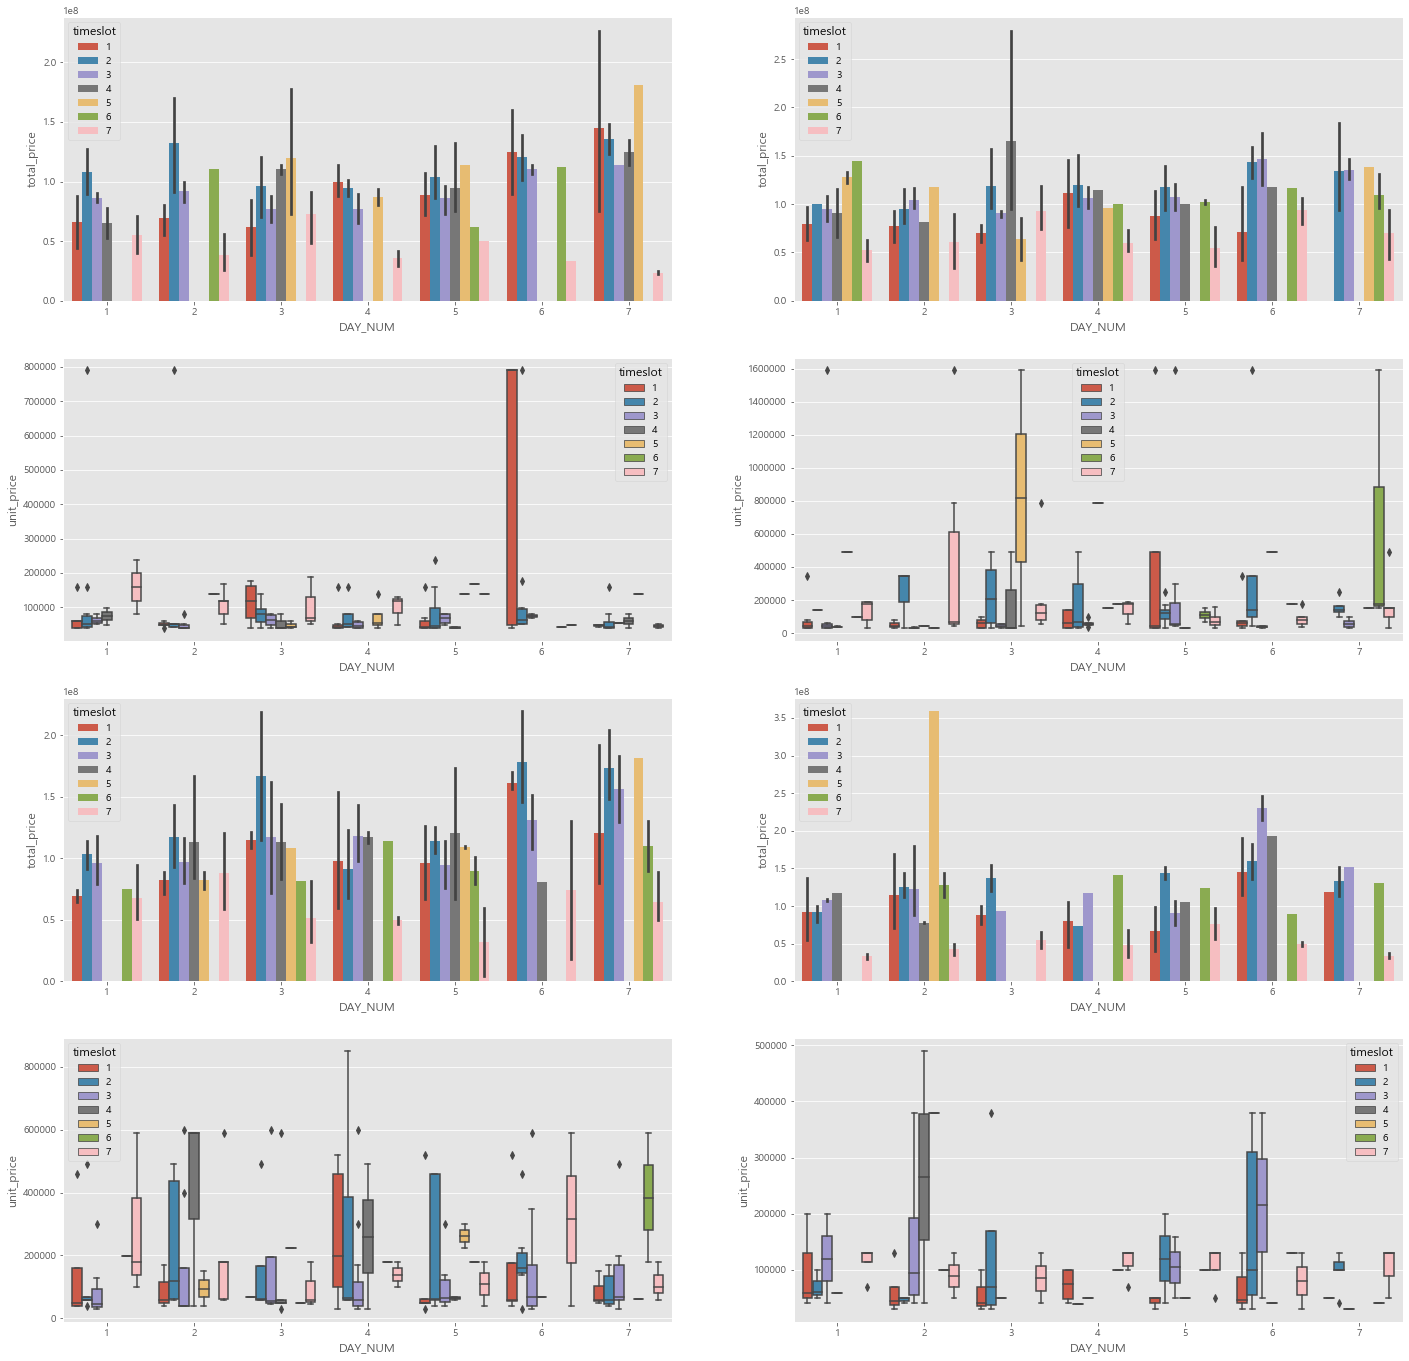

In [200]:
season_timeslot('잡화')

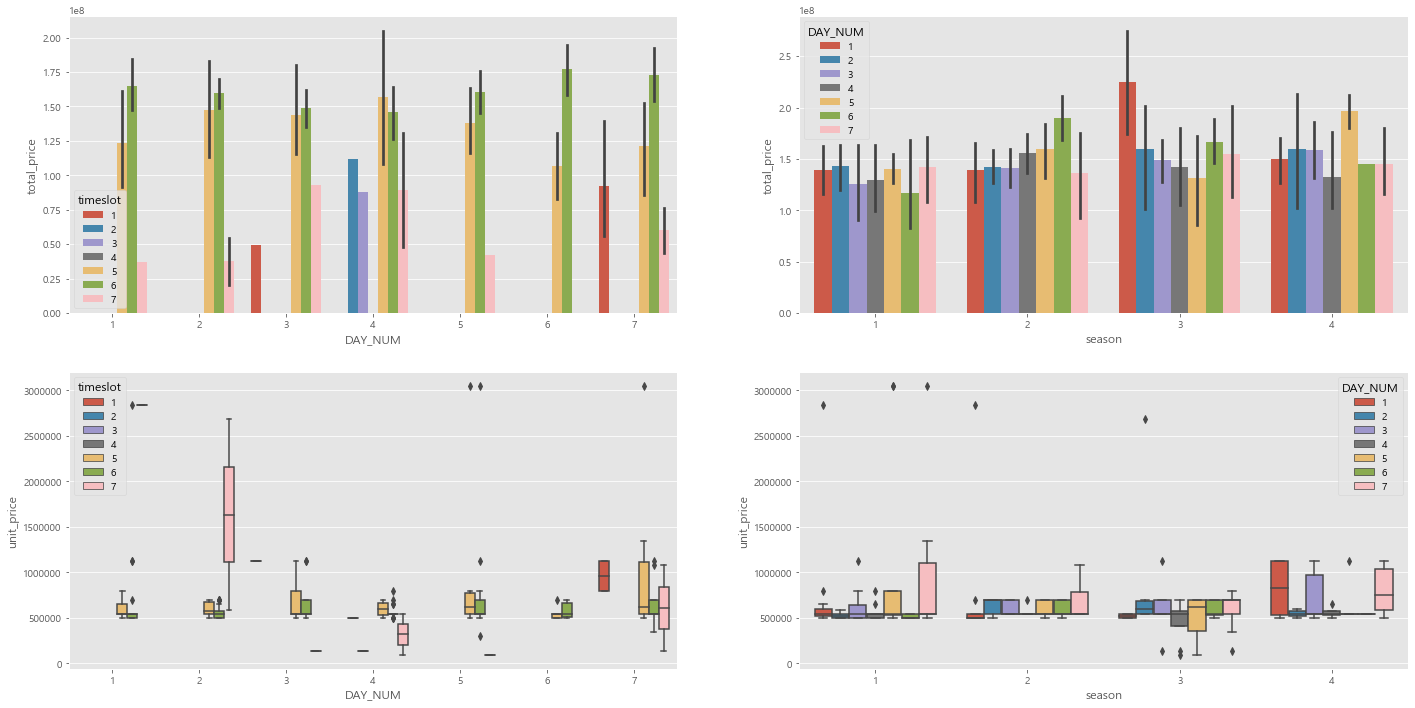

In [205]:
year_timeslot('가구')

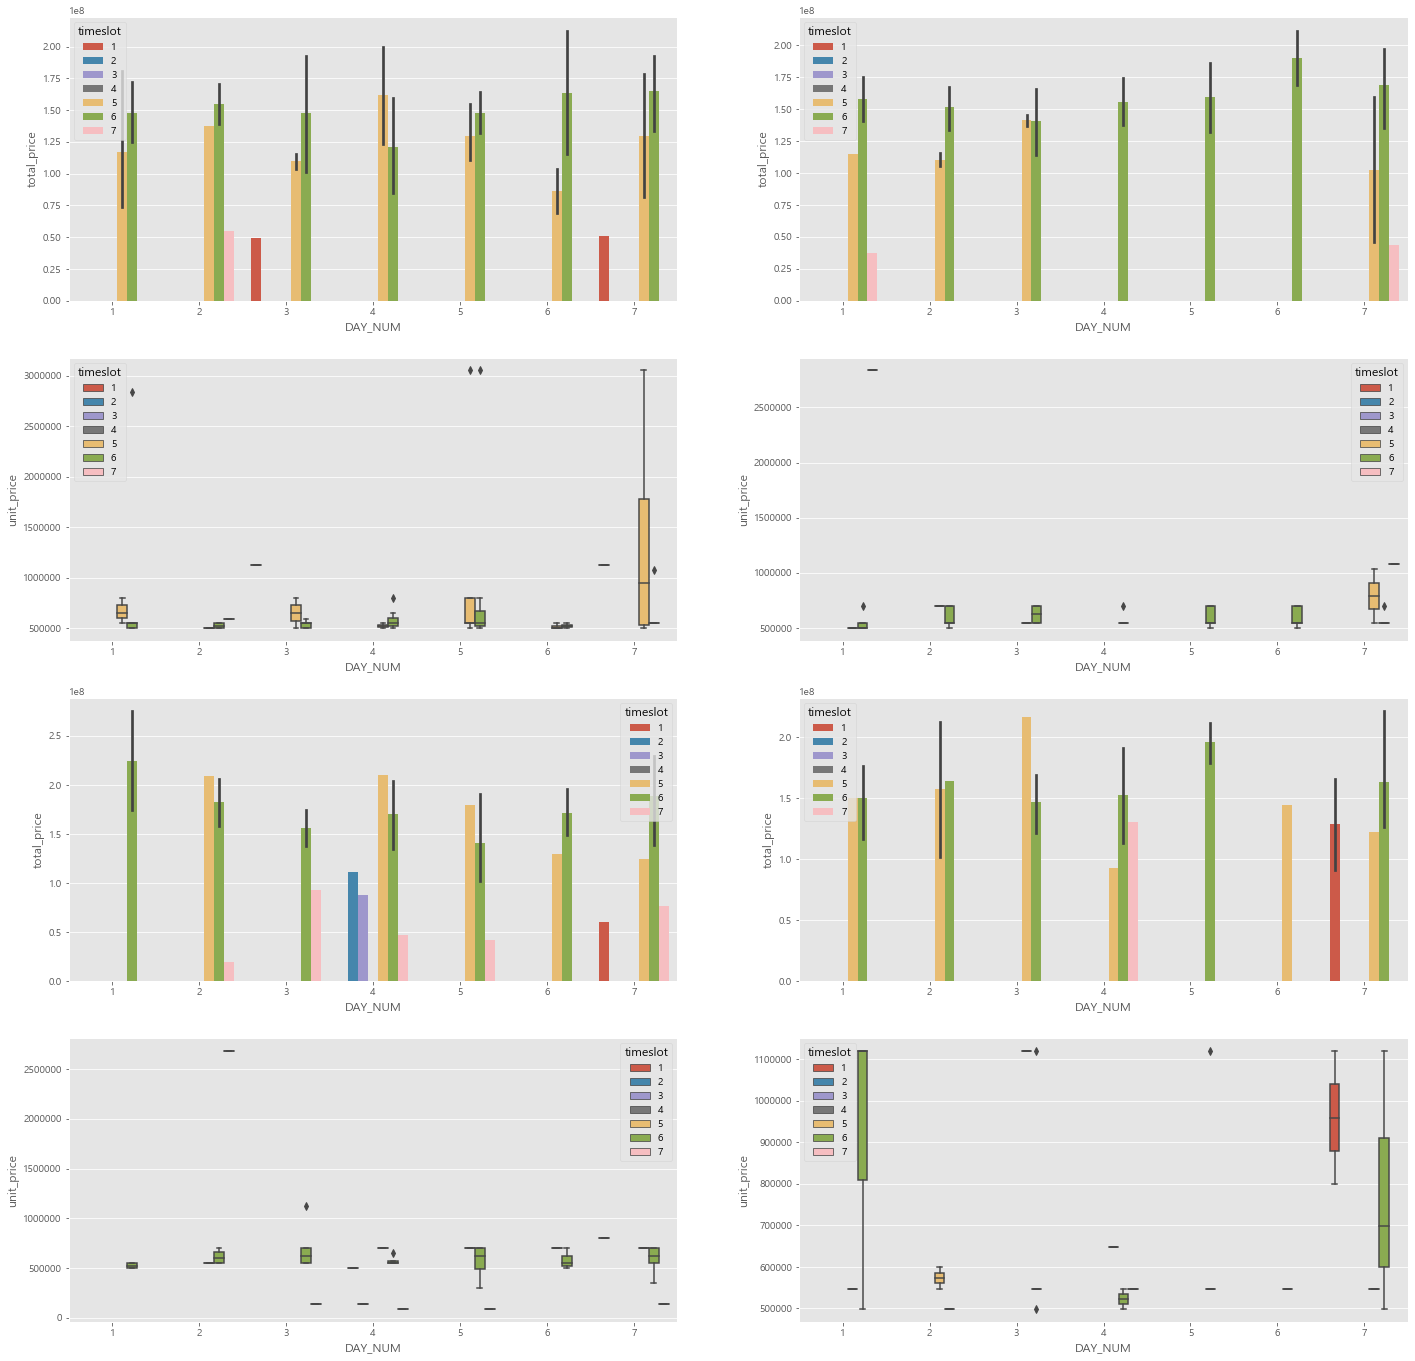

In [204]:
season_timeslot('가구')

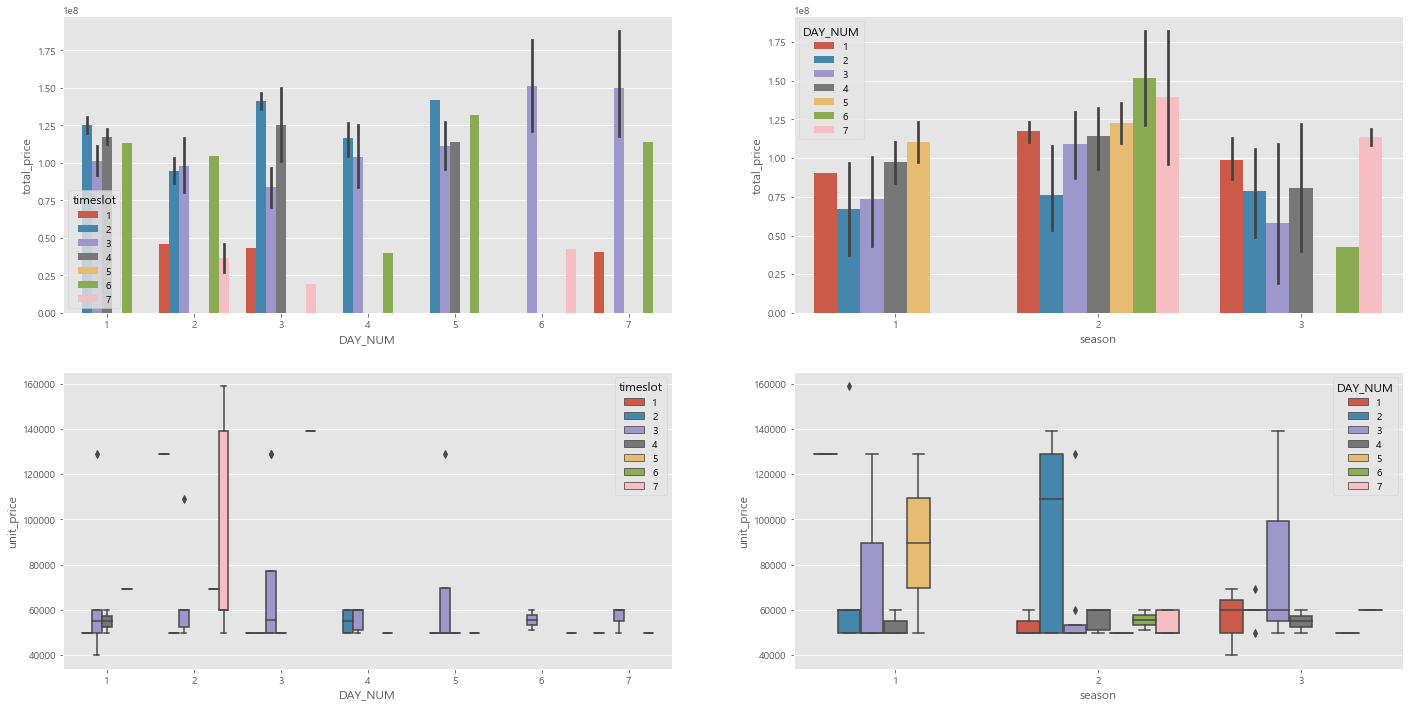

In [207]:
year_timeslot('침구')

IndexError: too many indices for array

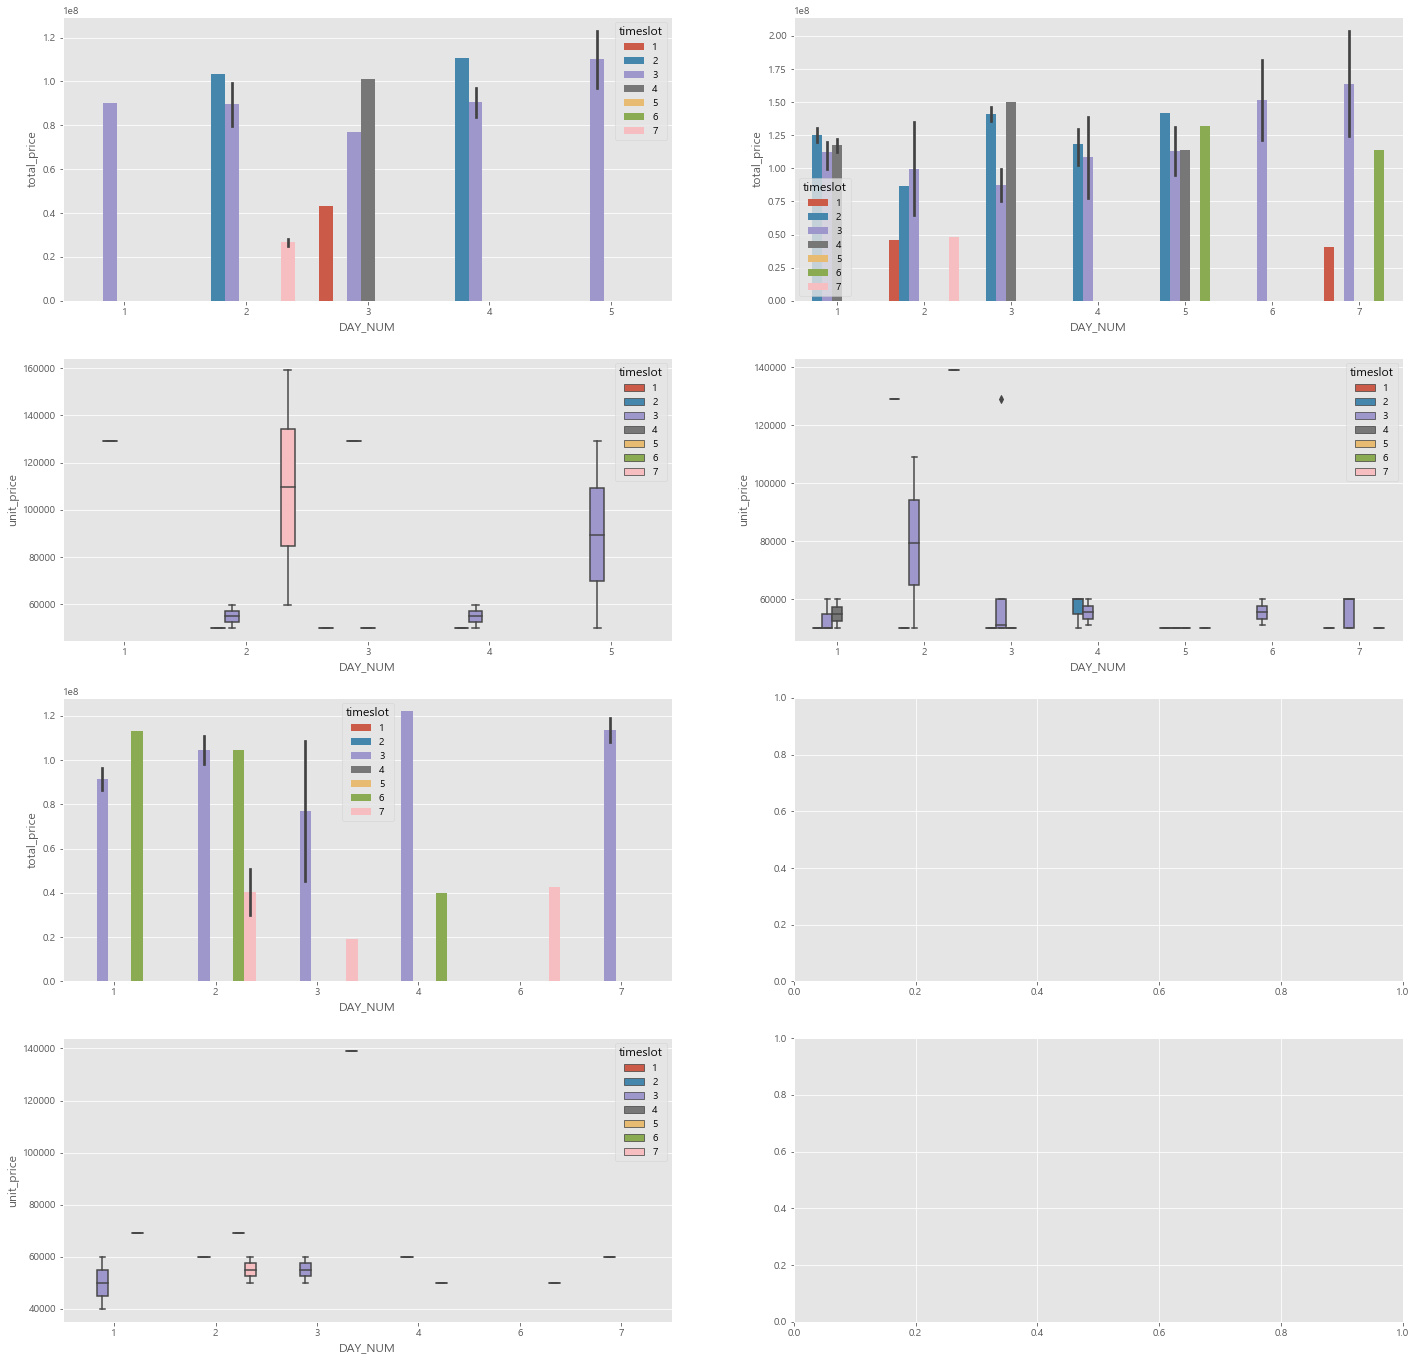

In [209]:
season_timeslot('침구')

In [215]:
split_df(sum_df,'p_group','침구')

,broadcast,exp_min,m_code,p_code,p_name,p_group,unit_price,total_price,sales,YEAR,...,DAY_NAME,DAY_NUM,p_group_code,new_code,no,sales_level,grade,quarter,timeslot,season
0,2019-04-18 12:00:00,60.000000,100140,200377,보몽드 순면60수 피그먼트워싱 침구세트 SS,침구,59900,83998000.0,1215.0,2019,...,Thursday,4,11,2242.0,11075,c,3,2,3,1
1,2019-04-23 13:00:00,60.000000,100140,200377,보몽드 순면60수 피그먼트워싱 침구세트 SS,침구,59900,79811000.0,1134.0,2019,...,Tuesday,2,11,2354.0,11638,c,3,2,3,1
2,2019-04-23 01:00:00,55.066667,100503,201541,(일)[한샘] 호텔식 레일 암막커튼 세트(중형),침구,159000,25176000.0,133.0,2019,...,Tuesday,2,11,2355.0,11725,a,4,2,7,1
3,2019-04-24 06:00:00,60.000000,100112,200309,리앤코리아 순면 볼륨 카페트 세트(중형),침구,49900,43304000.0,693.0,2019,...,Wednesday,3,11,2375.0,11749,b,4,2,1,1
4,2019-05-03 13:00:00,60.000000,100200,200675,효재 자수 광목 워싱 침구세트 슈퍼싱글,침구,129000,97161000.0,638.0,2019,...,Friday,5,11,2562.0,12743,b,3,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2019-11-11 14:20:00,60.000000,100143,200396,보몽드 카밀라 더블착번극세사 토퍼침구세트 SK(슈퍼킹),침구,59900,96350000.0,1325.0,2019,...,Monday,1,11,6866.0,33271,c,3,4,3,3
65,2019-11-13 13:20:00,60.000000,100143,200396,보몽드 카밀라 더블착번극세사 토퍼침구세트 SK(슈퍼킹),침구,59900,108818000.0,1511.0,2019,...,Wednesday,3,11,6943.0,33453,c,3,4,3,3
66,2019-11-19 13:20:00,60.000000,100143,200396,보몽드 카밀라 더블착번극세사 토퍼침구세트 SK(슈퍼킹),침구,59900,110848000.0,1526.0,2019,...,Tuesday,2,11,7164.0,34030,c,3,4,3,3
67,2019-11-21 12:20:00,60.000000,100143,200396,보몽드 카밀라 더블착번극세사 토퍼침구세트 SK(슈퍼킹),침구,59900,122006000.0,1638.0,2019,...,Thursday,4,11,7239.0,34239,d,3,4,3,3
